## Loading,Inspecting Google Analytics Timeseries data


In [0]:
from time import sleep
import csv

import pandas as pd
from fbprophet import Prophet
import numpy as np
import pandas as pd

import seaborn as sns

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller



In [0]:
#source: https://www.analyticsvidya.com/blog/2018/09/non-stationary-time-series-python/

def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [0]:
from google.colab import drive
import pandas as pd
import io
drive.mount('/content/gdrive')
from datetime import datetime


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
#if we try to lazy in google analytics csv exports,we run into trouble
googleanalyticsdata = pd.read_csv('/content/gdrive/My Drive/con1.csv')


In [0]:
#lets back up a step and print out the google analytics file,see if we can 
#locate the error.I am also goining to need to know how long the data is, as well

count = 0 
csvreader = csv.reader(open('/content/gdrive/My Drive/con1.csv'))
for aline in csvreader:
  count += 1
  print(aline)
  print('%s lines of data' %count)

['# ----------------------------------------', '']
1 lines of data
['# All Web Site Data', '']
2 lines of data
['# Audience Overview', '']
3 lines of data
['# 20190815-20200328', '']
4 lines of data
['# ----------------------------------------', '']
5 lines of data
['', '']
6 lines of data
['Day Index', 'Num0fCase']
7 lines of data
['2020/1/22', '1']
8 lines of data
['2020/1/23', '1']
9 lines of data
['2020/1/24', '2']
10 lines of data
['2020/1/25', '2']
11 lines of data
['2020/1/26', '5']
12 lines of data
['2020/1/27', '5']
13 lines of data
['2020/1/28', '5']
14 lines of data
['2020/1/29', '5']
15 lines of data
['2020/1/30', '5']
16 lines of data
['2020/1/31', '7']
17 lines of data
['2020/2/1', '8']
18 lines of data
['2020/2/2', '8']
19 lines of data
['2020/2/3', '11']
20 lines of data
['2020/2/4', '11']
21 lines of data
['2020/2/5', '11']
22 lines of data
['2020/2/6', '11']
23 lines of data
['2020/2/7', '11']
24 lines of data
['2020/2/8', '11']
25 lines of data
['2020/2/9', '11']
26 

In [0]:
# we look through the docs for read_csv and find the "skip row" parameter

googleanalyticsdata = pd.read_csv('/content/gdrive/My Drive/con1.csv',skiprows = [0,1,2,3,4,5])


In [0]:
googleanalyticsdata.tail()

,Day Index,Num0fCase
75,2020/4/6,366508
76,2020/4/7,396069
77,2020/4/8,428895
78,2020/4/9,461280
79,2020/4/10,496378


In [0]:
# the data time for 'Day Index' is not a date time object!

googleanalyticsdata['Day Index'].describe()

count            80
unique           80
top       2020/3/10
freq              1
Name: Day Index, dtype: object

In [0]:
googleanalyticsdata.tail()

,Day Index,Num0fCase
75,2020/4/6,366508
76,2020/4/7,396069
77,2020/4/8,428895
78,2020/4/9,461280
79,2020/4/10,496378


In [0]:
#let's get a sense of what the variation in the data is.
#standard deviation is 83. Varies from 0 to 548.
print(googleanalyticsdata['Num0fCase'].describe())

count        80.000000
mean      57654.800000
std      122362.144172
min           1.000000
25%          11.750000
50%          41.500000
75%       27628.500000
max      496378.000000
Name: Num0fCase, dtype: float64


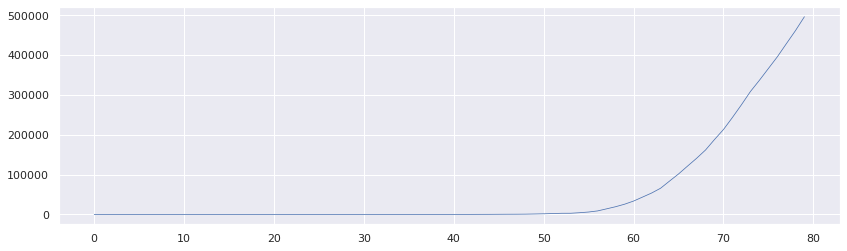

In [0]:
pd.plotting.register_matplotlib_converters()
sns.set(rc={'figure.figsize':(14,4)})
googleanalyticsdata['Num0fCase'].plot(linewidth=0.75)

## Learning more about the time series(ADF/ACF/PACF)


In [0]:
adf_test(googleanalyticsdata['Num0fCase'])

Results of Dickey-Fuller Test:
Test Statistic                  2.215173
p-value                         0.998895
#Lags Used                     12.000000
Number of Observations Used    67.000000
Critical Value (1%)            -3.531955
Critical Value (5%)            -2.905755
Critical Value (10%)           -2.590357
dtype: float64


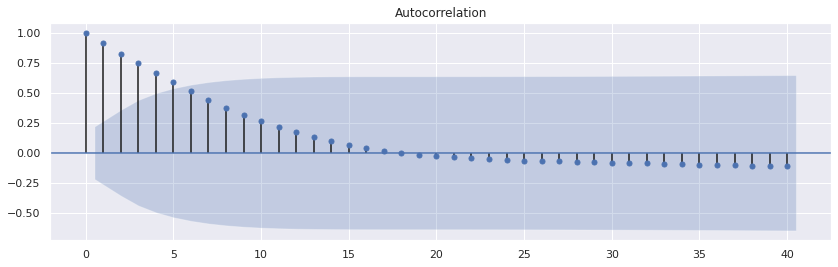

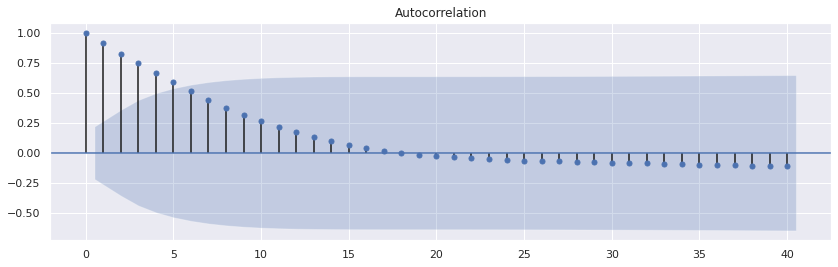

In [0]:
plot_acf(googleanalyticsdata['Num0fCase'],lags=40)

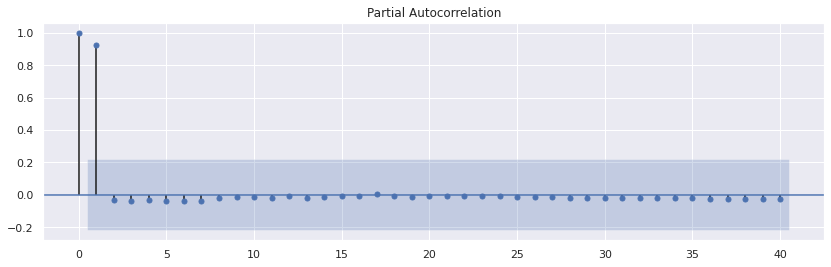

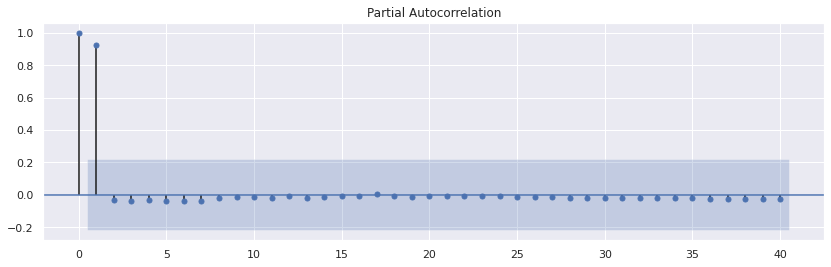

In [0]:
plot_pacf(googleanalyticsdata['Num0fCase'],lags=40)

## ARIMA Modeling

In [0]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA

Taking the parameters we learned from ADF,ACF,and PACF, let's try a model

In [0]:
model = ARIMA(googleanalyticsdata["Num0fCase"],order=(5,1,1))
model_fit = model.fit(disp=0)
summary = model_fit.summary().as_text()
for aline in summary.split(','):
  print(aline)

                             ARIMA Model Results                              
Dep. Variable:            D.Num0fCase   No. Observations:                   79
Model:                 ARIMA(5
 1
 1)   Log Likelihood                -689.898
Method:                       css-mle   S.D. of innovations         281823.847
Date:                Tue
 28 Apr 2020   AIC                           1395.796
Time:                        04:29:30   BIC                           1414.751
Sample:                             1   HQIC                          1403.390
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              6283.2554        nan        nan        nan         nan         nan
ar.L1.D.Num0fCase     1.6941   9.03e-06   1.88e+05      0.000       1.694       1.694
ar.L2.D.Num0fCase    -0.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:1441: RuntimeWarning:

invalid value encountered in sqrt

/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning:

invalid value encountered in less

/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning:

invalid value encountered in less_equal



In [0]:
model = ARIMA(googleanalyticsdata["Num0fCase"],order=(2,1,1))
model_fit = model.fit(disp=0)
summary = model_fit.summary().as_text()
for aline in summary.split(','):
  print(aline)

ValueError: ignored

In [0]:
model_fit.resid.head()

1   -6283.255401
2      -9.409726
3     -22.815478
4     -32.766752
5     -45.287603
dtype: float64

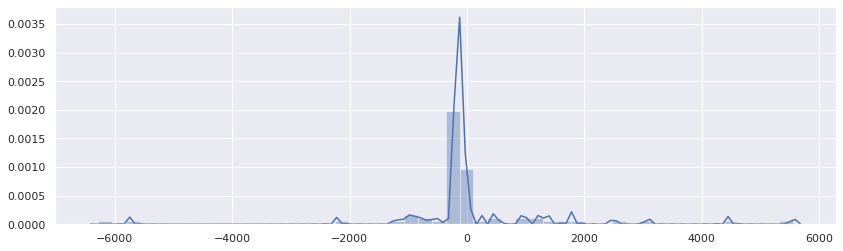

In [0]:
residuals = pd.DataFrame(model_fit.resid)
sns.distplot(residuals,hist=True,kde=True)

In [0]:
from statsmodels.stats.stattools import durbin_watson
print(durbin_watson(residuals))

[1.75314121]


In [0]:
#absolute value because we are not descriminating from being over or under on a prediction

absresiduals =abs(residuals)
print(np.mean(abs(residuals)))

0    680.371092
dtype: float64


In [0]:
#let's get a sense of what the variation in the data is.
#standard deviation is 83
#we can predict within a half of a standard deviation,good.Nor great.
print(googleanalyticsdata['Num0fCase'].describe())

count        80.000000
mean      57654.800000
std      122362.144172
min           1.000000
25%          11.750000
50%          41.500000
75%       27628.500000
max      496378.000000
Name: Num0fCase, dtype: float64


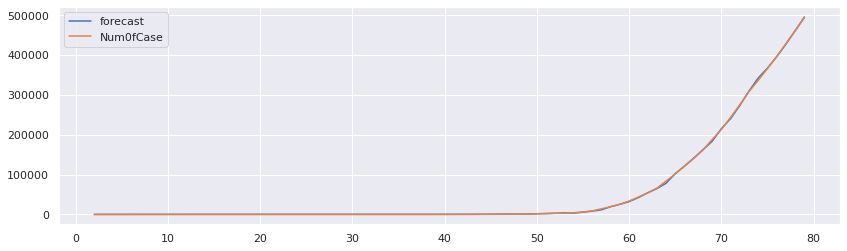

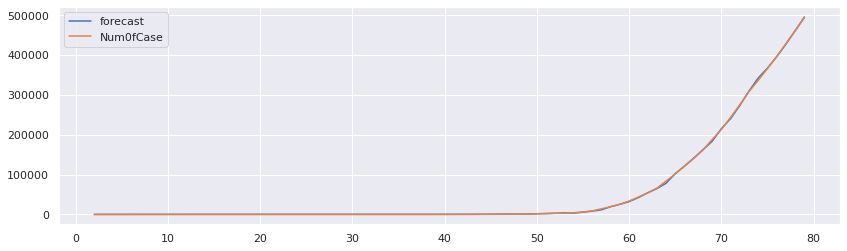

In [0]:
pd.plotting.register_matplotlib_converters()
model_fit.plot_predict()